# Vaccine efficacy analysis

This notebook reproduces some of the Bayesian analysis of Pfizer's COVID-19 vaccine used in the application for emergency use authorization. No use of PyMC3, because this is a fully conjugate model using standard probability distributions.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import time
tic = time.time()

## Pfizer's vaccine

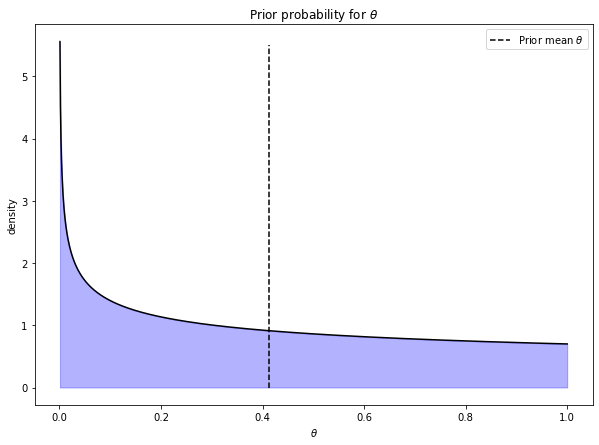

In [3]:
# Prior
grid = np.linspace(0, 1, 1000)
α0 = 0.7
β0 = 1
prior = sp.stats.beta(α0, β0)

plt.figure(figsize=(10, 7))
plt.plot(grid, prior.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  prior.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Prior probability for $\\theta$')
plt.vlines(x=prior.mean(), ymin = 0, ymax = 5.5, color = 'black', linestyles='--', label = 'Prior mean $\\theta$')
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()

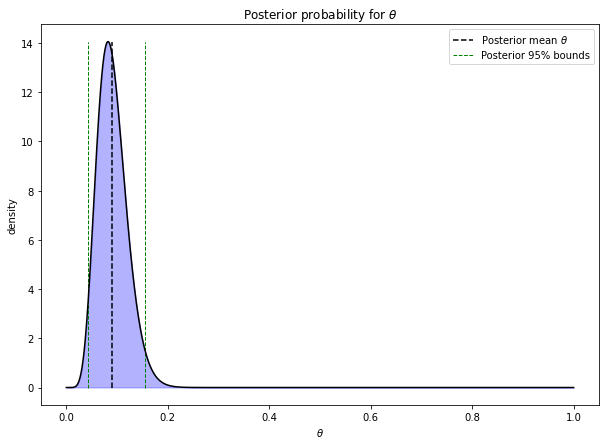

In [4]:
# Posterior assuming 8 cases in vaccine arm
posterior_1 = sp.stats.beta(α0 + 8, β0 + 86)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_1.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_1.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_1.mean(), ymin = 0, ymax = max(posterior_1.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_1.ppf(0.025), ymin = 0, ymax = max(posterior_1.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_1.ppf(0.975), ymin = 0, ymax = max(posterior_1.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()

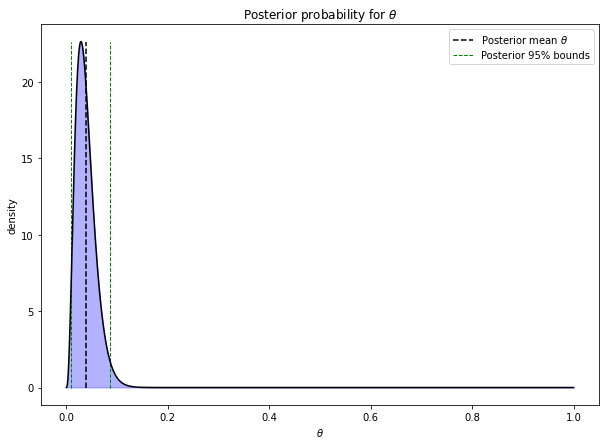

In [5]:
# Posterior assuming 3 cases in vaccine arm
posterior_2 = sp.stats.beta(α0 + 3, β0 + 91)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_2.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_2.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_2.mean(), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_2.ppf(0.025), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_2.ppf(0.975), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()

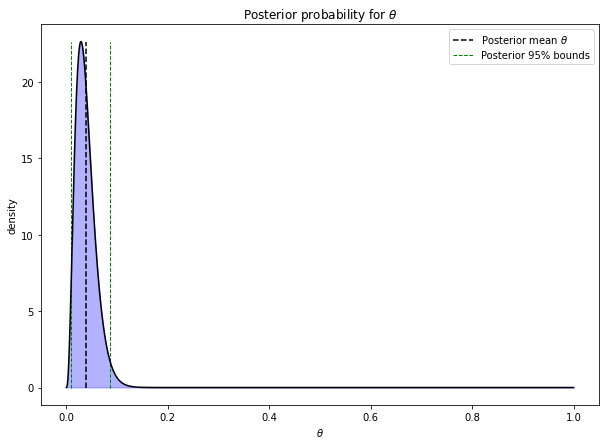

In [6]:
# Posterior with full data
posterior_4 = sp.stats.beta(α0 + 8, β0 + 162)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_2.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_2.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_2.mean(), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_2.ppf(0.025), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_2.ppf(0.975), ymin = 0, ymax = max(posterior_2.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()

## Moderna

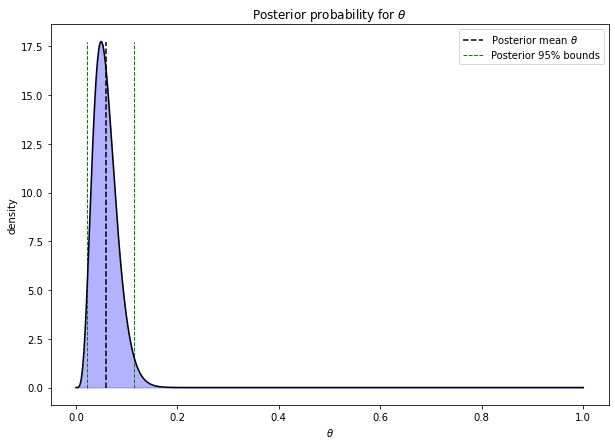

In [7]:
# Moderna's trial had 5 cases in the vaccine arm, 90 in the placebo arm
posterior_3 = sp.stats.beta(α0 + 5, β0 + 90)
plt.figure(figsize=(10, 7))
plt.plot(grid, posterior_3.pdf(grid), color = 'black')
plt.fill_between(grid, np.zeros_like(grid),  posterior_3.pdf(grid), color = 'blue', alpha = 0.3)
plt.title('Posterior probability for $\\theta$')
plt.vlines(x=posterior_3.mean(), ymin = 0, ymax = max(posterior_3.pdf(grid)), color = 'black', linestyles='--', label = 'Posterior mean $\\theta$')
plt.vlines(x=posterior_3.ppf(0.025), ymin = 0, ymax = max(posterior_3.pdf(grid)), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=posterior_3.ppf(0.975), ymin = 0, ymax = max(posterior_3.pdf(grid)), color = 'green', linestyles='--', lw=1)
plt.xlabel('$\\theta$')
plt.ylabel('density')
plt.legend()
plt.show()

### In terms of vaccine effectiveness

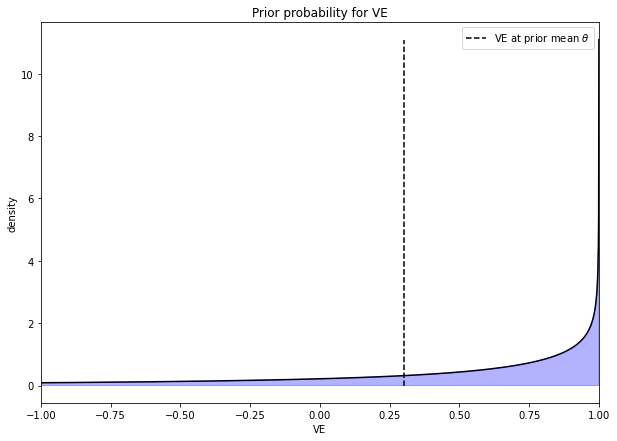

In [8]:
grid = np.linspace(0.0001, 0.9999, 1000)
ve_grid = 1 - grid / (1 - grid)
ve_y = prior.pdf(grid) / ((2 - ve_grid) ** 2)

plt.figure(figsize=(10, 7))
plt.plot(ve_grid, ve_y, color = 'black')
plt.fill_between(ve_grid, np.zeros_like(ve_grid),  ve_y, color = 'blue', alpha = 0.3)
plt.title('Prior probability for VE')
plt.vlines(x=(1 - 2*prior.mean())/(1 - prior.mean()), ymin = 0, ymax = max(ve_y), color = 'black', linestyles='--', label = 'VE at prior mean $\\theta$')
plt.xlim((-1, 1))
plt.xlabel('VE')
plt.ylabel('density')
plt.legend()
plt.show()

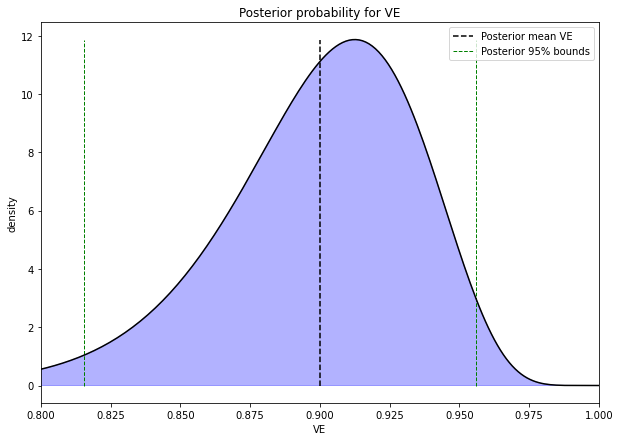

In [9]:
grid = np.linspace(0.0001, 0.9999, 1000)
ve_grid = 1 - grid / (1 - grid)
ve_y = posterior_1.pdf(grid) / ((2 - ve_grid) ** 2)

plt.figure(figsize=(10, 7))
plt.plot(ve_grid, ve_y, color = 'black')
plt.fill_between(ve_grid, np.zeros_like(ve_grid),  ve_y, color = 'blue', alpha = 0.3)
plt.title('Posterior probability for VE')
plt.vlines(x=(1 - 2*posterior_1.mean())/(1 - posterior_1.mean()), ymin = 0, ymax = max(ve_y), color = 'black', linestyles='--', label = 'Posterior mean VE')
plt.vlines(x=(1 - 2*posterior_1.ppf(0.025))/(1 - posterior_1.ppf(0.025)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=(1 - 2*posterior_1.ppf(0.975))/(1 - posterior_1.ppf(0.975)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1)
plt.xlim((0.8, 1))
plt.xlabel('VE')
plt.ylabel('density')
plt.legend()
plt.show()

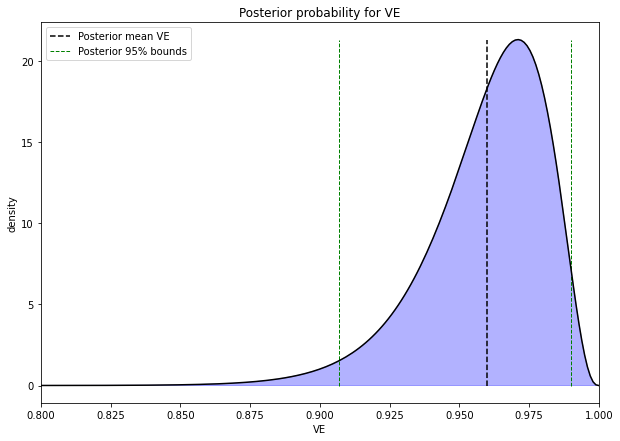

In [10]:
grid = np.linspace(0.0001, 0.9999, 1000)
ve_grid = 1 - grid / (1 - grid)
ve_y = posterior_2.pdf(grid) / ((2 - ve_grid) ** 2)

plt.figure(figsize=(10, 7))
plt.plot(ve_grid, ve_y, color = 'black')
plt.fill_between(ve_grid, np.zeros_like(ve_grid),  ve_y, color = 'blue', alpha = 0.3)
plt.title('Posterior probability for VE')
plt.vlines(x=(1 - 2*posterior_2.mean())/(1 - posterior_2.mean()), ymin = 0, ymax = max(ve_y), color = 'black', linestyles='--', label = 'Posterior mean VE')
plt.vlines(x=(1 - 2*posterior_2.ppf(0.025))/(1 - posterior_2.ppf(0.025)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=(1 - 2*posterior_2.ppf(0.975))/(1 - posterior_2.ppf(0.975)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1)
plt.xlim((0.8, 1))
plt.xlabel('VE')
plt.ylabel('density')
plt.legend()
plt.show()

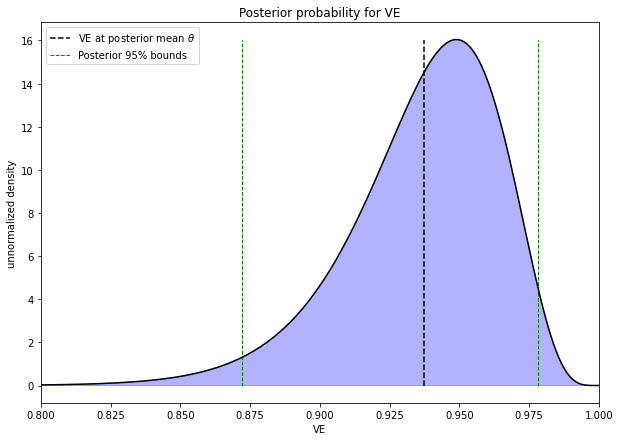

In [11]:
grid = np.linspace(0.0001, 0.9999, 1000)
ve_grid = 1 - grid / (1 - grid)
ve_y = posterior_3.pdf(grid) / ((2 - ve_grid) ** 2)

plt.figure(figsize=(10, 7))
plt.plot(ve_grid, ve_y, color = 'black')
plt.fill_between(ve_grid, np.zeros_like(ve_grid),  ve_y, color = 'blue', alpha = 0.3)
plt.title('Posterior probability for VE')
plt.vlines(x=(1 - 2*posterior_3.mean())/(1 - posterior_3.mean()), ymin = 0, ymax = max(ve_y), color = 'black', linestyles='--', label = 'VE at posterior mean $\\theta$')
plt.vlines(x=(1 - 2*posterior_3.ppf(0.025))/(1 - posterior_3.ppf(0.025)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=(1 - 2*posterior_3.ppf(0.975))/(1 - posterior_3.ppf(0.975)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1)
plt.xlim((0.8, 1))
plt.xlabel('VE')
plt.ylabel('unnormalized density')
plt.legend()
plt.show()

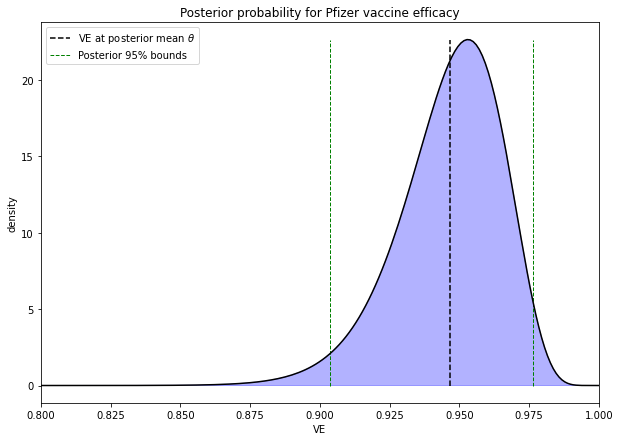

In [12]:
grid = np.linspace(0.0001, 0.9999, 1000)
ve_grid = 1 - grid / (1 - grid)
ve_y = posterior_4.pdf(grid) / ((2 - ve_grid) ** 2)

plt.figure(figsize=(10, 7))
plt.plot(ve_grid, ve_y, color = 'black')
plt.fill_between(ve_grid, np.zeros_like(ve_grid),  ve_y, color = 'blue', alpha = 0.3)
plt.title('Posterior probability for Pfizer vaccine efficacy')
plt.vlines(x=(1 - 2*posterior_4.mean())/(1 - posterior_4.mean()), ymin = 0, ymax = max(ve_y), color = 'black', linestyles='--', label = 'VE at posterior mean $\\theta$')
plt.vlines(x=(1 - 2*posterior_4.ppf(0.025))/(1 - posterior_4.ppf(0.025)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1, label = 'Posterior 95% bounds')
plt.vlines(x=(1 - 2*posterior_4.ppf(0.975))/(1 - posterior_4.ppf(0.975)), ymin = 0, ymax = max(ve_y), color = 'green', linestyles='--', lw=1)
plt.xlim((0.8, 1))
plt.xlabel('VE')
plt.ylabel('density')
plt.legend()
plt.show()

In [13]:
toc = time.time()
print("Notebook ran in", round(toc - tic), "seconds.")
print("NumPy version", np.__version__)
print("SciPy version", sp.__version__)

Notebook ran in 3 seconds.
NumPy version 1.20.1
SciPy version 1.6.0
